In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Activation, Dense, Conv2D, MaxPool2D, Flatten
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import categorical_crossentropy
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import confusion_matrix

import itertools
import os
import shutil
import random
import glob
import warnings
import matplotlib.pyplot as plt
warnings.simplefilter(action='ignore', category=FutureWarning)
%matplotlib inline

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os
# os.chdir("drive/")
os.getcwd()

'/content'

In [ ]:
train_path = 'drive/MyDrive/Dataset/cats vs dogs/train'
valid_path = 'drive/MyDrive/Dataset/cats vs dogs/valid'
test_path = 'drive/MyDrive/Dataset/cats vs dogs/test'

In [ ]:
# tf.keras.applications.vgg16.preprocess_input [c1, c2, c3 .......c1000] , c1 = 0.1, c2 = .02, c3 = 0.66 ...
# or
# tf.keras.applications.mobilenet.preprocess_input
train_batches = ImageDataGenerator(preprocessing_function = tf.keras.applications.mobilenet.preprocess_input) \
                .flow_from_directory(directory=train_path, target_size=(224, 224), classes=['cat', 'dog'], batch_size=10)

valid_batches = ImageDataGenerator(preprocessing_function = tf.keras.applications.mobilenet.preprocess_input) \
                .flow_from_directory(directory=valid_path, target_size=(224, 224), classes=['cat', 'dog'], batch_size=10)

test_batches = ImageDataGenerator(preprocessing_function = tf.keras.applications.mobilenet.preprocess_input) \
                .flow_from_directory(directory=test_path, target_size=(224, 224), classes=['cat', 'dog'], batch_size=10)

Found 1000 images belonging to 2 classes.
Found 200 images belonging to 2 classes.
Found 100 images belonging to 2 classes.


In [ ]:
assert train_batches.n == 1000
assert valid_batches.n == 200
assert test_batches.n == 100

assert train_batches.num_classes == valid_batches.num_classes == test_batches.num_classes == 2

In [ ]:
imgs, labels = next(train_batches)

In [ ]:
def plotImages(images_arr):
    fig, axes = plt.subplots(1, 10, figsize=(20, 20))
    axes = axes.flatten()
    
    for img, ax in zip(images_arr, axes):
        ax.imshow(img)
        ax.axis('off')
    plt.tight_layout()
    plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

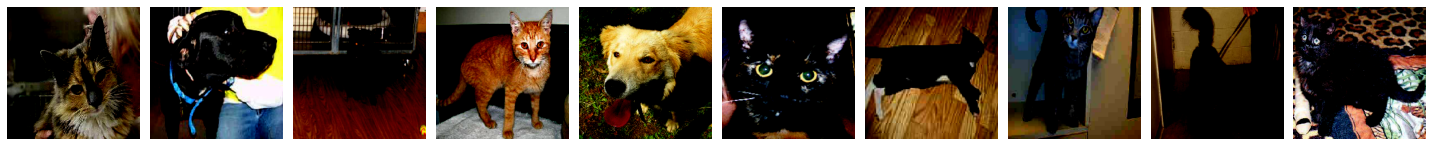

In [ ]:
plotImages(imgs)
# the images have their colors distorted as they have been preprocessed 
# so that they can be used for more smooth training.

In [ ]:
print(labels)

[[1. 0.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [1. 0.]]


In [ ]:
model_own = Sequential([
    Conv2D(filters=32, kernel_size=(3,3), activation='relu', padding='same', input_shape=(224,224,3)), # 3 is for rgb color configuration
    MaxPool2D(pool_size=(2,2), strides=2),
    Conv2D(filters=64, kernel_size=(3,3), activation='relu', padding='same'),
    MaxPool2D(pool_size=(2,2), strides=2),
    Flatten(),
    Dense(units=2, activation='softmax'), # since ther are only two classes cats and dogs.
])


In [ ]:
model_own.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])
# if the above code gives error, then you can use binary_crossentropy.


In [ ]:
model_own.fit(x=train_batches, validation_data=valid_batches, epochs=20, verbose=2)


Epoch 1/20
100/100 - 764s - loss: 0.6913 - accuracy: 0.5800 - val_loss: 0.6381 - val_accuracy: 0.6250
Epoch 2/20
100/100 - 6s - loss: 0.5760 - accuracy: 0.6820 - val_loss: 0.6333 - val_accuracy: 0.6200
Epoch 3/20
100/100 - 6s - loss: 0.4743 - accuracy: 0.7880 - val_loss: 0.6095 - val_accuracy: 0.6700
Epoch 4/20
100/100 - 6s - loss: 0.3789 - accuracy: 0.8490 - val_loss: 0.6163 - val_accuracy: 0.6500
Epoch 5/20
100/100 - 6s - loss: 0.3066 - accuracy: 0.9030 - val_loss: 0.6262 - val_accuracy: 0.6700
Epoch 6/20
100/100 - 6s - loss: 0.2305 - accuracy: 0.9480 - val_loss: 0.6293 - val_accuracy: 0.6950
Epoch 7/20
100/100 - 6s - loss: 0.1763 - accuracy: 0.9660 - val_loss: 0.7278 - val_accuracy: 0.6400
Epoch 8/20
100/100 - 6s - loss: 0.1501 - accuracy: 0.9710 - val_loss: 0.7301 - val_accuracy: 0.6650
Epoch 9/20
100/100 - 6s - loss: 0.1061 - accuracy: 0.9920 - val_loss: 0.7162 - val_accuracy: 0.6950
Epoch 10/20
100/100 - 6s - loss: 0.0766 - accuracy: 0.9960 - val_loss: 0.7631 - val_accuracy: 0.64

In [ ]:
# Download model - Internet connection needed for the first time
mobile_new = tf.keras.applications.mobilenet.MobileNet()

17227776/17225924 [==============================] - 0s 0us/step


In [ ]:
mobile_new.summary()

Model: "mobilenet_1.00_224"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
conv1 (Conv2D)               (None, 112, 112, 32)      864       
_________________________________________________________________
conv1_bn (BatchNormalization (None, 112, 112, 32)      128       
_________________________________________________________________
conv1_relu (ReLU)            (None, 112, 112, 32)      0         
_________________________________________________________________
conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)      288       
_________________________________________________________________
conv_dw_1_bn (BatchNormaliza (None, 112, 112, 32)      128       
_________________________________________________________________
conv_dw_1_relu (ReLU)        (None, 112, 112, 32

In [ ]:
# how to choose till when to take in the layer, you have to experiment
x = mobile_new.layers[-6].output
output = Dense(units=2, activation='softmax')(x) # 2 as we have two classes dogs and cats.
# We know that mobilenet and vgg16 both are functional model while we use Sequential model to create
# neural networks. Before we were iterating over all layers from vgg16 to a sequential model
# now we are directly using the model itself.

In [ ]:
Models = Model(inputs=mobile_new.input, outputs=output)


In [ ]:
for layer in Models.layers[:-23]: # there are 88 layers and want to only train the last 23 layers
    layer.trainable = False

NameError: ignored

In [ ]:
Models.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
conv1 (Conv2D)               (None, 112, 112, 32)      864       
_________________________________________________________________
conv1_bn (BatchNormalization (None, 112, 112, 32)      128       
_________________________________________________________________
conv1_relu (ReLU)            (None, 112, 112, 32)      0         
_________________________________________________________________
conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)      288       
_________________________________________________________________
conv_dw_1_bn (BatchNormaliza (None, 112, 112, 32)      128       
_________________________________________________________________
conv_dw_1_relu (ReLU)        (None, 112, 112, 32)      0   

In [ ]:
Models.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
Models.fit(x=train_batches, validation_data=valid_batches, epochs=15, verbose=2)

Epoch 1/15
100/100 - 5s - loss: 0.1798 - accuracy: 0.9430 - val_loss: 0.2859 - val_accuracy: 0.9100
Epoch 2/15
100/100 - 5s - loss: 0.1268 - accuracy: 0.9550 - val_loss: 0.1400 - val_accuracy: 0.9550
Epoch 3/15
100/100 - 5s - loss: 0.0433 - accuracy: 0.9860 - val_loss: 0.1115 - val_accuracy: 0.9550
Epoch 4/15
100/100 - 5s - loss: 0.0513 - accuracy: 0.9840 - val_loss: 0.2625 - val_accuracy: 0.9450
Epoch 5/15
100/100 - 5s - loss: 0.0175 - accuracy: 0.9940 - val_loss: 0.2277 - val_accuracy: 0.9500
Epoch 6/15
100/100 - 5s - loss: 0.0125 - accuracy: 0.9960 - val_loss: 0.0583 - val_accuracy: 0.9700
Epoch 7/15
100/100 - 5s - loss: 0.0047 - accuracy: 0.9990 - val_loss: 0.0491 - val_accuracy: 0.9800
Epoch 8/15
100/100 - 5s - loss: 0.0128 - accuracy: 0.9930 - val_loss: 0.1332 - val_accuracy: 0.9500
Epoch 9/15
100/100 - 5s - loss: 0.0079 - accuracy: 0.9970 - val_loss: 0.1014 - val_accuracy: 0.9600
Epoch 10/15
100/100 - 5s - loss: 0.0160 - accuracy: 0.9950 - val_loss: 0.0769 - val_accuracy: 0.9800

In [ ]:
prediction_new = Models.predict(x=test_batches, verbose=0)
prediction_new[0]

array([1.0000000e+00, 6.1900274e-10], dtype=float32)

In [2]:
# Since the value at 0th index is closer to 1 that means our model predicted cat as the class of the image.

In [ ]:
model.save("MyDrive/Dataset/Models/cats_dogs_classifier.h5")

Saved model to disk
